In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('driver-data.csv')
data.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [3]:
data.isnull().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)

In [6]:
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
kmeans.cluster_centers_

array([[3.42331165e+09, 7.69926775e+01, 1.11656289e+01],
       [3.42331325e+09, 7.69558448e+01, 1.05907384e+01],
       [3.42331245e+09, 7.54435572e+01, 1.08557214e+01],
       [3.42331085e+09, 7.73519875e+01, 9.98875000e+00],
       [3.42331405e+09, 7.34446348e+01, 1.10037783e+01]])

In [8]:
print (kmeans.labels_)
print (len(kmeans.labels_))

[0 1 4 ... 1 1 0]
4000


In [9]:
print (type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 802, 1: 799, 2: 803, 3: 801, 4: 795}


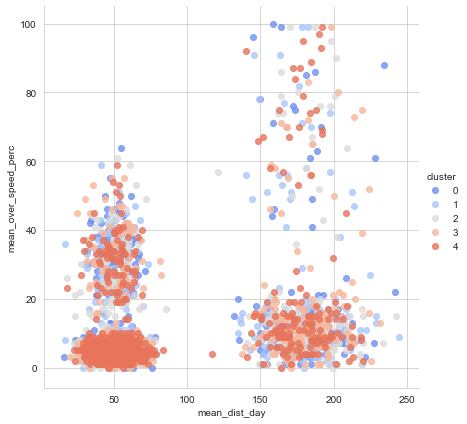

In [13]:
# plot the data 
data['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day', 'mean_over_speed_perc',data=data, hue='cluster',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)